<a href="https://colab.research.google.com/github/yashshrikant99/Deep-learning/blob/master/final_project_dont_edit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!pip install tensorflow==2.1.0

  Using cached https://files.pythonhosted.org/packages/85/d4/c0cd1057b331bc38b65478302114194bd8e1b9c2bbc06e300935c0e93d90/tensorflow-2.1.0-cp36-cp36m-manylinux2010_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d9/41/bbf49b61370e4f4d245d4c6051dfb6db80cec672605c91b1652ac8cc3d38/tensorboard-2.1.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/18/90/b77c328a1304437ab1310b463e533fa7689f4bfc41549593056d812fab8e/tensorflow_estimator-2.1.0-py2.py3-none-any.whl
ERROR: -ensorflow 2.2.0rc3 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: -ensorflow 2.2.0rc3 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 2.1.1 which is incompatible.
ERROR: -ensorflow 2.2.0rc3 has requirement tensorflow-estimator<2.3.0,>=2.2.0rc0, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
ERROR: tensorflow-gpu 1.14.0 has requirement tensorboard<1.15.0,>=1.14.0, but you'll have tensorboard 2.1.1 which is 

In [0]:
import os
import matplotlib as plt
import tensorflow as tf
batch_size=5
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,RMSprop
var_name=os.listdir("/content/drive/My Drive/cie-deep_learning/DATASET/training")


# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range = 0.2, brightness_range=[0.5,1.5])


train_generator = train_datagen.flow_from_directory(
        '/content/drive/My Drive/cie-deep_learning/DATASET/training', 
        target_size=(200, 200),  
        batch_size=batch_size,
        classes=var_name,
        class_mode='categorical')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),

    
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    
    
    
    
    tf.keras.layers.Dense(41, activation='softmax')
])

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])
ind = train_generator.class_indices
inv_dict = {v: k for k, v in ind.items()} 
total_sample=train_generator.n
number_of_epochs=45
history = model.fit_generator(
        train_generator, 
        steps_per_epoch=int(total_sample/batch_size),  
        epochs=number_of_epochs,
        
        verbose=1)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-b95da7eca403>", line 3, in <module>
    import tensorflow as tf
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/__init__.py", line 101, in <module>
    from tensorflow_core import *
  File "/usr/local/lib/python3.6/dist-packages/tensorflow_core/__init__.py", line 40, in <module>
    from tensorflow.python.tools import module_util as _module_util
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/__init__.py", line 50, in __getattr__
    module = self._load()
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/__init__.py", line 44, in _load
    module = _importlib.import_module(self.__name__)
  File "/usr/lib/python3.6/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "/usr/loc

ImportError: ignored

In [0]:
model.save('/content/drive/My Drive/cie-deep_learning/model_11pred.h5')

In [0]:
import numpy as np
from keras.preprocessing import image


img_pred = image.load_img('/content/drive/My Drive/cie-deep_learning/Inference_Data/posterior limb of the left internal capsule/DWI.jpg', target_size = (200, 200))

img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis = 0)
rslt = model.predict(img_pred)

ind = train_generator.class_indices
a=rslt.tolist()

b=a[0]


for i in b:
    if i>0:
        print(var_name[b.index(i)])
        

Right lentiform nucleus


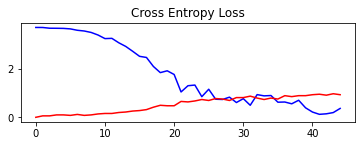

In [0]:
import matplotlib.pyplot as plt
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['acc'], color='red', label='train')



In [0]:
import os
import matplotlib as plt
import tensorflow as tf
batch_size=5
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,RMSprop
def freeze_session(session, keep_var_names=None, output_names=None, clear_devices=True):
   
    graph = session.graph
    with graph.as_default():
        freeze_var_names = list(set(v.op.name for v in tf.global_variables()).difference(keep_var_names or []))
        output_names = output_names or []
        output_names += [v.op.name for v in tf.global_variables()]
        input_graph_def = graph.as_graph_def()
        if clear_devices:
            for node in input_graph_def.node:
                node.device = ""
        frozen_graph = tf.graph_util.convert_variables_to_constants(
            session, input_graph_def, output_names, freeze_var_names)
        return frozen_graph

from keras import backend as K

# Create, compile and train model...

frozen_graph = freeze_session(K.get_session(),
                              output_names=[out.op.name for out in model.outputs])
tf.train.write_graph(frozen_graph, "/content/drive/My Drive/frozen/low_size files", "model.pb", as_text=False)

RuntimeError: ignored

In [0]:
tf.train.write_graph(frozen_graph, "/content/drive/My Drive/frozen/low_size files", "model.pb", as_text=False)

'/content/drive/My Drive/frozen/low_size files/model.pb'